In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
DATADIR = "../input/zalando-store-crawl/zalando"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input


from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

vgg_model = vgg16.VGG16(weights='imagenet')

2022-04-05 07:31:24.251583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 07:31:24.338767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 07:31:24.339515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 07:31:24.340630: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath) 
        else:
            allFiles.append(fullPath)
               
    return allFiles    

# Get the list of all files in directory tree at given path
files = getListOfFiles(DATADIR)
# remove non jpg files
files = [f for f in files if (f.endswith(".jpg"))]
files

In [5]:
print("Total number of images:",len(files))

Total number of images: 32350


In [ ]:
#System crashes if any bigger! 
import random
files= random.sample(files, 1000)
files

# Test feature extraction with one image

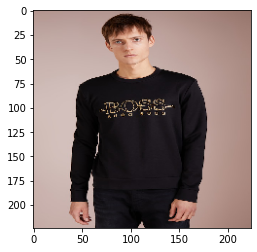

Image loaded successfully!


In [7]:
img = load_img(files[1], target_size=(224, 224))
plt.imshow(img)
plt.show()
print("Image loaded successfully!")

In [8]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
numpy_image = img_to_array(img)
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('Image Batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

Image Batch size (1, 224, 224, 3)


In [10]:
img_features = feat_extractor.predict(processed_image)

print("Features successfully extracted for one image!")
print("Number of image features:",img_features.size)
img_features

2022-04-05 07:32:30.872735: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-05 07:32:31.803313: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Features successfully extracted for one image!
Number of image features: 4096


array([[0.        , 0.        , 0.        , ..., 0.        , 0.07913795,
        0.        ]], dtype=float32)

## Works with one image, so do it for the whole 1000 images

In [11]:
importedImages = []

for fileindex in files:
    try:
        original = load_img(fileindex, target_size=(224, 224))
    except:
         None
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [12]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shapei

features successfully extracted!


AttributeError: 'numpy.ndarray' object has no attribute 'shapei'

In [13]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,../input/zalando-store-crawl/zalando/sweatshirt/6CA22S00O-A11@15.jpg,../input/zalando-store-crawl/zalando/sweatshirt/BG122S01Q-Q12@7.jpg,../input/zalando-store-crawl/zalando/zalando/hoodies-female/HO021J009-E11@13.jpg,../input/zalando-store-crawl/zalando/sweatshirt/JA222S12A-Q11@13.1.jpg,../input/zalando-store-crawl/zalando/shirt/OB022O01G-I11@8.jpg,../input/zalando-store-crawl/zalando/zalando/longsleeve/NA622O021-K11@8.jpg,../input/zalando-store-crawl/zalando/hoodies-female/2NA21J0IQ-C11@1.1.jpg,../input/zalando-store-crawl/zalando/sweatshirt/2NA22S07T-K12@1.1.jpg,../input/zalando-store-crawl/zalando/hoodies/IJ022S010-K11@10.jpg,../input/zalando-store-crawl/zalando/sweatshirt-female/ON321J0H8-B11@17.1.jpg,...,../input/zalando-store-crawl/zalando/shirt/EA722O00Z-C11@7.jpg,../input/zalando-store-crawl/zalando/zalando/shirt/6CA22O01G-Q11@7.jpg,../input/zalando-store-crawl/zalando/hoodies-female/UR621J01P-C12@5.1.jpg,../input/zalando-store-crawl/zalando/sweatshirt/LY222S01M-K11@10.jpg,../input/zalando-store-crawl/zalando/hoodies/EA822S000-K11@10.jpg,../input/zalando-store-crawl/zalando/zalando/shirt/H0422O04B-G11@10.jpg,../input/zalando-store-crawl/zalando/zalando/shirt/S3422O013-C11@10.jpg,../input/zalando-store-crawl/zalando/zalando/shirt/NE322O00N-Q11@14.jpg,../input/zalando-store-crawl/zalando/zalando/sweatshirt/RE022S00T-K11@10.jpg,../input/zalando-store-crawl/zalando/hoodies/SO222S083-K11@14.jpg
../input/zalando-store-crawl/zalando/sweatshirt/6CA22S00O-A11@15.jpg,1.000000,0.675253,0.409450,0.677554,0.680303,0.658639,0.485132,0.521210,0.560138,0.639010,...,0.579293,0.628743,0.436458,0.522565,0.574810,0.632354,0.564696,0.570775,0.587943,0.579136
../input/zalando-store-crawl/zalando/sweatshirt/BG122S01Q-Q12@7.jpg,0.675253,1.000000,0.502838,0.686130,0.743158,0.773568,0.532671,0.601771,0.667357,0.647983,...,0.762005,0.632210,0.518938,0.683379,0.680245,0.657421,0.614016,0.533543,0.652629,0.725956
../input/zalando-store-crawl/zalando/zalando/hoodies-female/HO021J009-E11@13.jpg,0.409450,0.502838,1.000000,0.350515,0.561389,0.550023,0.429411,0.389632,0.466677,0.555881,...,0.525478,0.425013,0.422852,0.546139,0.424583,0.472893,0.465741,0.344285,0.589377,0.528255
../input/zalando-store-crawl/zalando/sweatshirt/JA222S12A-Q11@13.1.jpg,0.677554,0.686130,0.350515,1.000000,0.703107,0.720064,0.388269,0.515325,0.614356,0.538001,...,0.547552,0.723577,0.506534,0.598471,0.718337,0.727034,0.620620,0.691452,0.639175,0.673003
../input/zalando-store-crawl/zalando/shirt/OB022O01G-I11@8.jpg,0.680303,0.743158,0.561389,0.703107,1.000000,0.728588,0.488421,0.496545,0.653080,0.739202,...,0.704180,0.735138,0.436964,0.628797,0.706124,0.766328,0.759211,0.680128,0.717361,0.632822


In [14]:
# function to retrieve the most similar products for a given one
nb_closest_images= 5
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(224,224))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(224,224))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


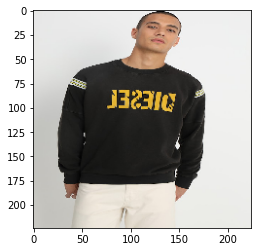

-----------------------------------------------------------------------
most similar products:


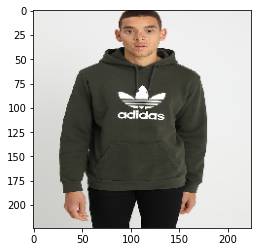

similarity score :  0.8962116


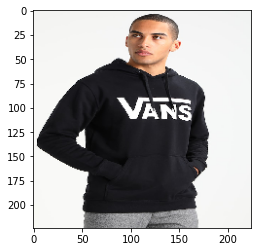

similarity score :  0.87988853


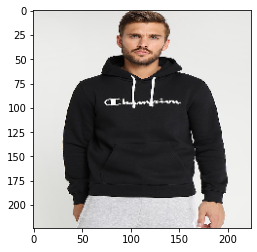

similarity score :  0.8792858


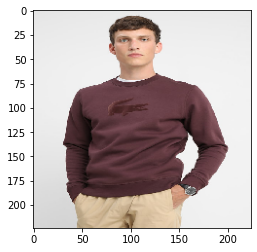

similarity score :  0.87600416


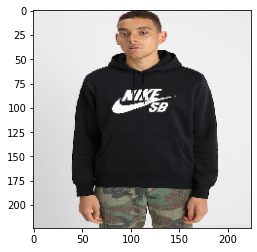

similarity score :  0.86691874


In [17]:
retrieve_most_similar_products(files[10])